# Visualizing Networks


가능한 layout리스트 : ['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',

 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# read in the graph (networkx의 Graph 객체로 저장되어 있다)
G = pickle.load(open('Data/major_us_cities', 'rb'))

In [15]:
# edges에 담겨있는 정보 확인
list(G.edges(data=True))[:5]

[('El Paso, TX', 'Albuquerque, NM', {'weight': 367.88584356108345}),
 ('El Paso, TX', 'Mesa, AZ', {'weight': 536.256659972679}),
 ('El Paso, TX', 'Tucson, AZ', {'weight': 425.41386739988224}),
 ('El Paso, TX', 'Phoenix, AZ', {'weight': 558.7835703774161}),
 ('El Paso, TX', 'Colorado Springs, CO', {'weight': 797.7517116740046})]

In [16]:
# Nodes에 담겨있는 정보 확인
list(G.nodes(data=True))[:5]

[('El Paso, TX', {'population': 674433, 'location': (-106, 31)}),
 ('Long Beach, CA', {'population': 469428, 'location': (-118, 33)}),
 ('Dallas, TX', {'population': 1257676, 'location': (-96, 32)}),
 ('Oakland, CA', {'population': 406253, 'location': (-122, 37)}),
 ('Albuquerque, NM', {'population': 556495, 'location': (-106, 35)})]

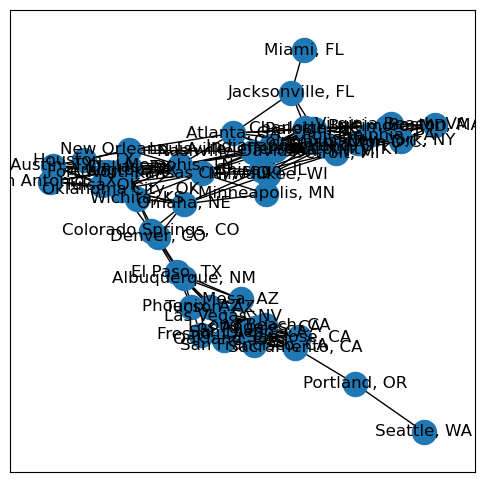

In [17]:
# draw the graph using the default spring layout
plt.figure(figsize=(6,6))
nx.draw_networkx(G)

# draw_networkx의 default가 draw_networkx인가 보군

In [18]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

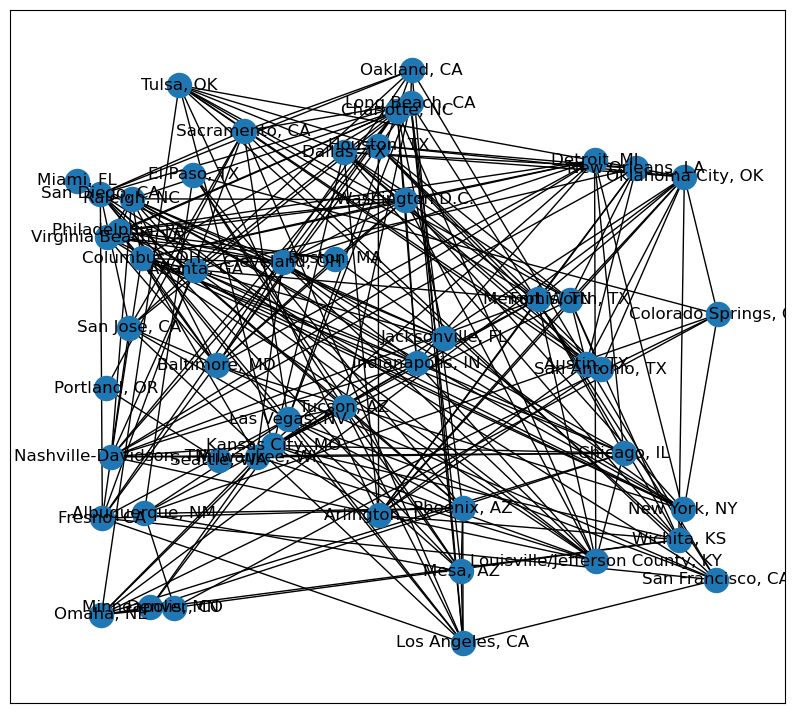

In [19]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

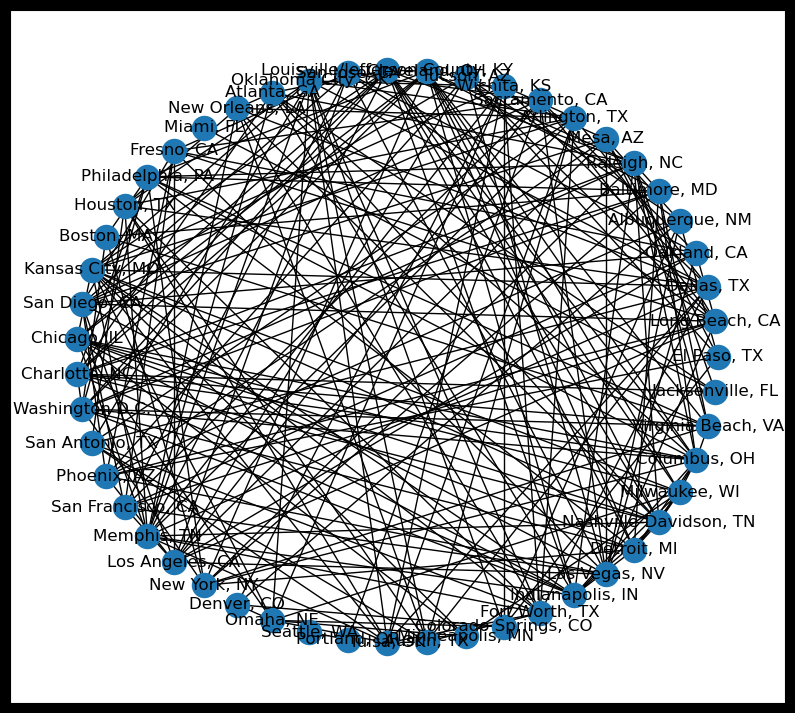

In [46]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9), facecolor='k')
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

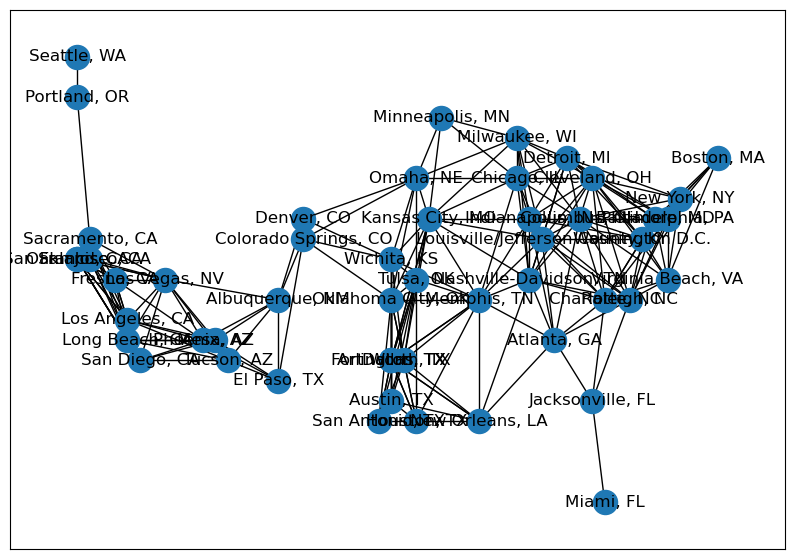

In [49]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

# get_node_attributes로 정보를 받아올 수 있군 // get_edge_attributes로 edge 정보도 받아올 수 있겠군
pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

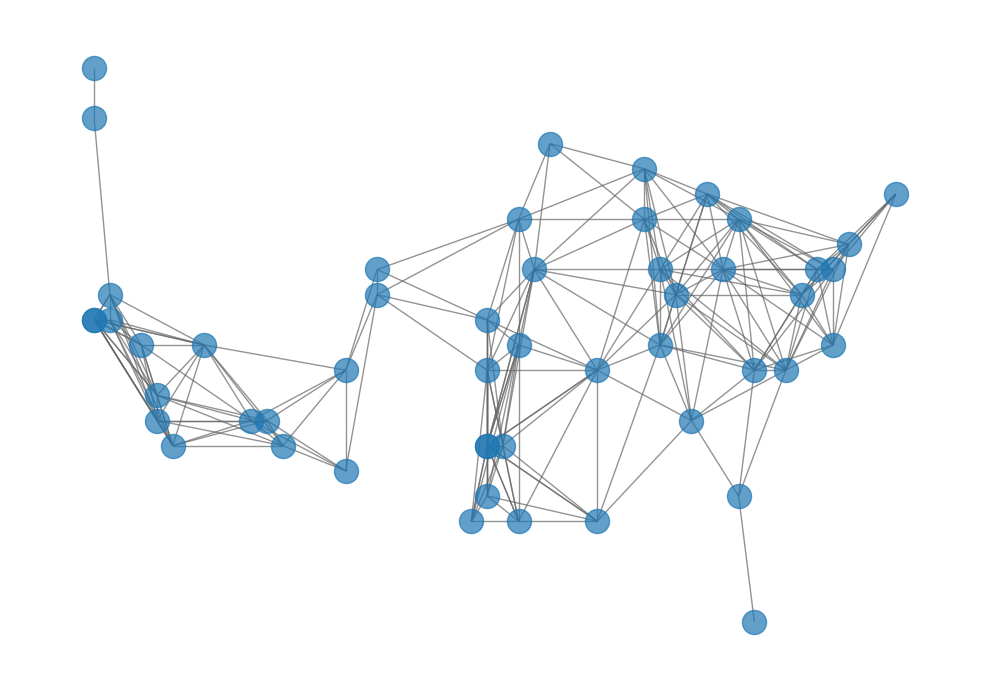

In [50]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

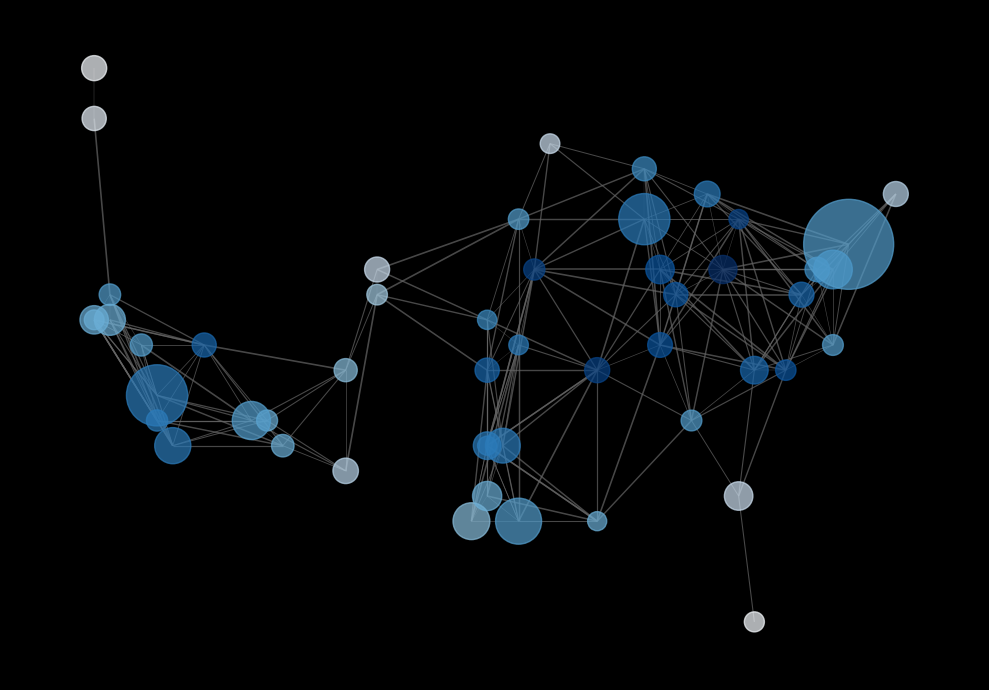

In [53]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7), facecolor='k')

# 연결된 노드가 몇 개 인가 (degree로 접근하는 군)
node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G] # for v in G는 노드 이름을 리턴
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

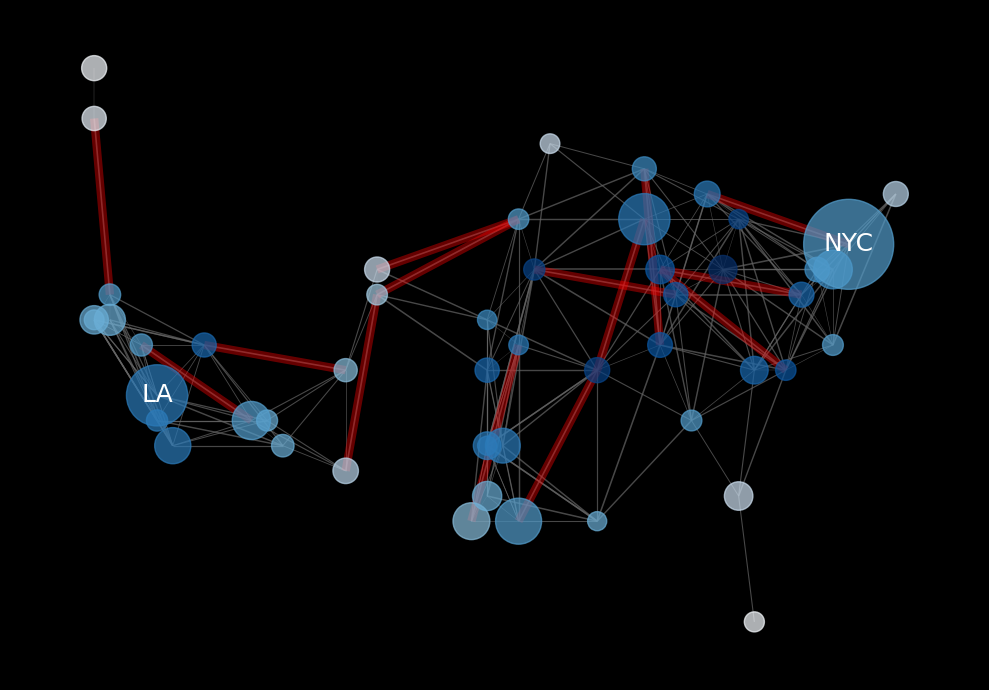

In [44]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7), facecolor="k")

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()] # edge의 정보라서 어디서, 어디까지라는 정보가 필요해서 이렇게 접근한다

# 전체를 그리고
nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]

# 강조할 나머지를 전체에 덮어서 그린다
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)
nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();